In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# What does the distribution of AI healthcare startups look like across India?

In [2]:
df = pd.read_excel('cleaned_healthcare_data.xlsx')


In [3]:
df[df['state'].isnull()]

,serial_no,company,overview,funding,city,state,year_founded,stage,employee_count,valuation,annual_revenue,business_model,description,website
276,277,Clinician,Provider of AI based differential diagnosis sy...,NaN,India,NaN,2018.0,Unfunded,NaN,NaN,6107.31,Healthcare IT > Provider > Clinical Operations...,Clinician AI is an AI-based clinical decision ...,https://clinicianai.com
397,398,Zodiapp,AI based platform offering stress and anxiety ...,NaN,India,NaN,2023.0,Unfunded,NaN,NaN,NaN,Disease Self Management > Neurological Disorde...,AI based platform offering stress and anxiety ...,https://zodiapp.in
446,447,Mageia Analytica,AI-based tumor detection tool for healthcare p...,NaN,India,NaN,2019.0,Deadpooled,NaN,NaN,NaN,Healthcare IT > Provider > Clinical Operations...,AI-based tumor detection tool for healthcare p...,http://mageia-analytica.com
493,494,ApnaMD,AI-powered platform for the diagnosis of symptoms,NaN,India,NaN,2022.0,Unfunded,NaN,NaN,NaN,Disease Self Management > Symptom Checkers,NaN,http://apnamd.ai
626,627,LeafNet,AI-powered marketing platform for cannabis ind...,NaN,India,NaN,2023.0,Unfunded,NaN,NaN,NaN,Cannabis HealthTech > Cannabis Business IT > M...,AI-powered marketing platform for cannabis ind...,https://leafnet.in
634,635,MedweiSer Health,Provider of AI-enabled app for checking the sy...,NaN,India,NaN,2015.0,Unfunded,NaN,NaN,NaN,Disease Self Management > Symptom Checkers > C...,Provider of AI-enabled app for checking the sy...,http://www.medweiser.com/index.php
649,650,THEBABYBIRTH.COM,AI powered chatbot platform offering expert ad...,NaN,India,NaN,2020.0,Unfunded,NaN,NaN,NaN,Online Health Information > Internet First Med...,AI powered baby health chatbot that offers exp...,https://thebabybirth.com
665,666,Boltt,Developer of an app for reward-based AI-enable...,NaN,India,NaN,NaN,Deadpooled,NaN,NaN,NaN,Fitness & Wellness Tech > Physical Fitness > T...,Boltt has developed an app for reward-based AI...,http://boltt.co.in


In [4]:
df = df.dropna(subset=['state'])

In [5]:

#df[df['city'] == 'India']
df.drop(df[df['city'] == 'India'].index, inplace=True)


## Analysing top states/cities

Let's analyse states first. I have already cleaned the data containing multiple values of states, to bring it to a single value relevant for our case. Example: "Maharashtra, New York" to "Maharashtra"

In [6]:
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'company_count']
print(state_counts)

                            state  company_count
0                       Karnataka            191
1                     Maharashtra            102
2                             NCT             72
3                       Telangana             58
4                      Tamil Nadu             48
5                         Haryana             41
6                         Gujarat             24
7                     West Bengal             24
8                   Uttar Pradesh             22
9                       Rajasthan             13
10                         Kerala             12
11                          Delhi              8
12                         Odisha              7
13                 Madhya Pradesh              6
14  Union Territory Of Chandigarh              5
15                 Andhra Pradesh              3
16                          Bihar              3
17                          Assam              2
18               Himachal Pradesh              2
19              Jamm

In [7]:
top_states = state_counts.sort_values(by='company_count', ascending=False).head(10)

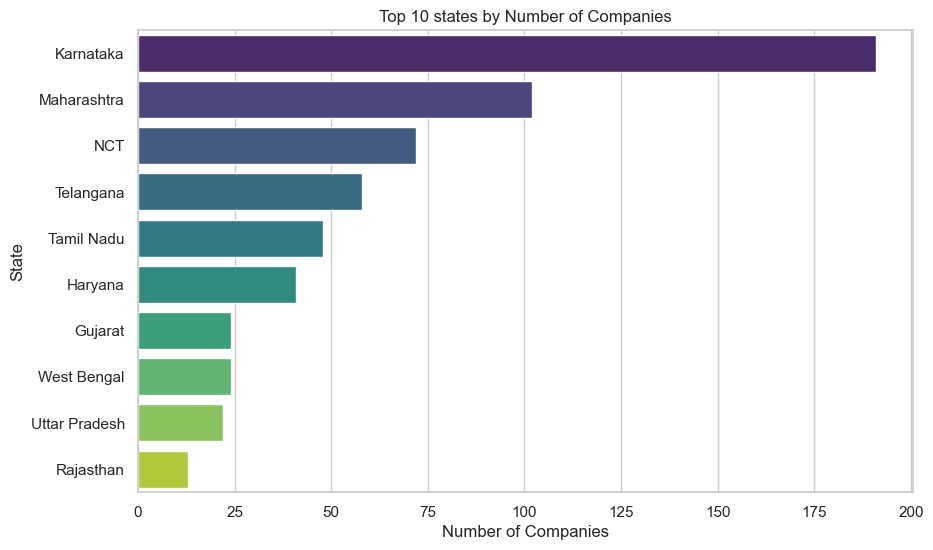

In [8]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='company_count', y='state', data=top_states, palette='viridis')

# Set plot title and labels
plt.title('Top 10 states by Number of Companies')
plt.xlabel('Number of Companies')
plt.ylabel('State')

# Display the plot
plt.show()

Same thing for cities now

In [9]:
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'company_count']
print(city_counts)

         city  company_count
0   Bengaluru            184
1       Delhi             71
2   Hyderabad             57
3      Mumbai             45
4        Pune             39
..        ...            ...
76   Madhapur              1
77     Kadapa              1
78       Ooty              1
79     Imphal              1
80    Haryana              1

[81 rows x 2 columns]


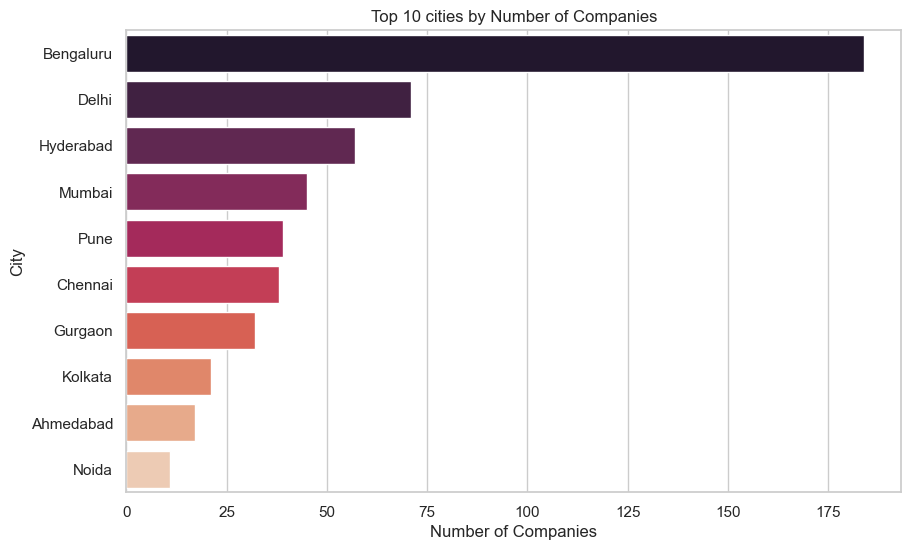

In [10]:
top_cities = city_counts.sort_values(by='company_count', ascending=False).head(10)

sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='company_count', y='city', data=top_cities, palette='rocket')

# Set plot title and labels
plt.title('Top 10 cities by Number of Companies')
plt.xlabel('Number of Companies')
plt.ylabel('City')

# Display the plot
plt.show()

A map showing distribution of startups across India

In [11]:
#geocoding
#! pip install geopy
from geopy import geocoders
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time



In [12]:
#geolocator = Nominatim(user_agent="geoapiExercises", timeout = 10)
geocoder = geocoders.Nominatim(user_agent = 'india_startup_mapping')
def get_lat_long(city):
    try:
        location = geocoder.geocode(city)
        if location:
            return (location.latitude, location.longitude)
        else:
            return (None, None)
    except GeocoderTimedOut:
        return get_lat_long(city)
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return (None, None)


In [13]:
coordinates = []

# Iterate through each city and get coordinates
for city in city_counts['city']:
    coordinates.append(get_lat_long(city))
    time.sleep(2)  # Sleep for 1 second to respect Nominatim's rate limit

# Add coordinates to DataFrame
city_counts['coordinates'] = coordinates
city_counts[['latitude', 'longitude']] = pd.DataFrame(city_counts['coordinates'].tolist(), index=city_counts.index)
city_counts.drop('coordinates', axis=1, inplace=True)
#city_counts[['latitude', 'longitude']] = pd.DataFrame(city_counts['coordinates'].tolist(), index=city_counts.index)
#city_counts.drop('coordinates', axis=1, inplace=True)

Error geocoding Thiruvananthapuram: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Thiruvananthapuram&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


In [14]:
city_counts.head(10)

,city,company_count,latitude,longitude
0,Bengaluru,184,12.988157,77.622600
1,Delhi,71,28.627393,77.171695
2,Hyderabad,57,17.360589,78.474061
3,Mumbai,45,18.973354,72.828105
4,Pune,39,18.521428,73.854454
5,Chennai,38,13.083694,80.270186
6,Gurgaon,32,28.464615,77.029919
7,Kolkata,21,22.572646,88.363895
8,Ahmedabad,17,23.021537,72.580057
9,Noida,11,28.570633,77.327215


In [15]:
#refer this:

# data1 = [dict(type='scattergeo',lat = snow_sample['lat'],lon = snow_sample['long'],
#              marker = dict(size = 9, autocolorscale=False,colorscale = 'Viridis',
#             color = snow_sample['elev'], colorbar = dict(title='Elevation (m)')))]


# layout1 = dict(title='NOAA Weather Snowfall Station Elevations',
#               geo = dict(scope='usa',projection = dict(type ='albers usa'),showland = True,
#                     landcolor="rgb(250,250,250)",subunitcolor = "rgb(217,217,217)",
#                      countrycolor = "rgb(217,217,217)",countrywidth =0.5, subunitwidth=0.5))

# plotly.offline.iplot({
#     "data": data1,
#     "layout": layout1
# })

In [16]:

import plotly.tools as tls
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

In [41]:
import plotly.express as px
scale= 2
mapdata = [dict(type='scattergeo', lat = city_counts['latitude'], lon = city_counts['longitude'], 
               marker = dict(size= (city_counts['company_count'])/scale + 1, autocolorscale=False, colorscale = 'Viridis',
                            color = city_counts['company_count'], colorbar = dict(title = 'Healthcare startup distribution')))]

layout1 = dict(title = 'Healthcare startup distribution', 
              geo = dict(scope = 'asia', projection = dict(type = 'natural earth'), showland = True, landcolor = "rgb(250,250,250)",subunitcolor = "rgb(217,217,217)",
                      countrycolor = "rgb(217,217,217)", countrywidth =0.5, subunitwidth=0.5))

In [42]:
plotly.offline.iplot({
    "data": mapdata,
    "layout": layout1
})